In [10]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [11]:
zipfolder = '/Users/Ihor/goit-ds-hws/data/data.zip'

In [12]:
with zipfile.ZipFile(zipfolder, 'r') as zip:
  zip.extractall('/Users/Ihor/goit-ds-hws/data/main_d')

folder = '/Users/Ihor/goit-ds-hws/data/main_d/data'
data_set = pd.DataFrame()

for activity_folder in os.listdir(folder):
    activity_path = os.path.join(folder, activity_folder)
    if not os.path.isdir(activity_path):
        continue

    for file in os.listdir(activity_path):
        file_path = os.path.join(activity_path, file)
        if not file.endswith('.csv'):
            continue

        df = pd.read_csv(file_path)
        df['activity'] = activity_folder
        data_set = pd.concat([data_set, df], ignore_index=True)

data_set

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,1.757344,-5.875371,-3.878607,running
1,2.461239,12.986150,1.762132,running
2,22.682667,22.922087,-1.738190,running
3,11.875240,4.611233,-8.389283,running
4,-5.295974,4.783615,-1.273715,running
...,...,...,...,...
193855,-4.137180,-4.429273,-1.517924,stairs
193856,1.829170,-9.313444,-0.330400,stairs
193857,-7.350199,-12.670115,-1.460463,stairs
193858,3.969586,-6.320692,9.255983,stairs


In [13]:

label_encoder = LabelEncoder()
data_set['activity'] = label_encoder.fit_transform(data_set['activity'])
data_set['activity']

0         1
1         1
2         1
3         1
4         1
         ..
193855    2
193856    2
193857    2
193858    2
193859    2
Name: activity, Length: 193860, dtype: int64

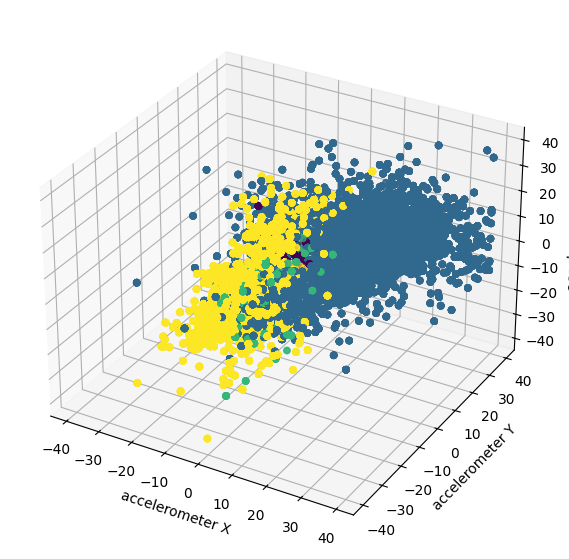

In [14]:

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection = '3d')

ax.scatter(data_set['accelerometer_X'], data_set['accelerometer_Y'], data_set['accelerometer_Z'], c=data_set['activity'], cmap="viridis")
ax.set_xlabel("accelerometer X")
ax.set_ylabel("accelerometer Y")
ax.set_zlabel("accelerometer Z")
plt.show()

In [15]:
X = data_set[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = data_set['activity']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [16]:
data_set['activity'] = label_encoder.inverse_transform(data_set['activity'])

y_pred = svm_model.predict(X_test)
result = classification_report(y_test, y_pred, output_dict=True)

In [17]:
report_df = pd.DataFrame(result).transpose()
report_df

,precision,recall,f1-score,support
0,0.957650,0.989984,0.973548,6190.000000
1,0.928536,0.903145,0.915664,20443.000000
2,1.000000,0.003171,0.006322,946.000000
3,0.805062,0.898061,0.849022,11193.000000
accuracy,0.893583,0.893583,0.893583,0.893583
macro avg,0.922812,0.698590,0.686139,38772.000000
weighted avg,0.899282,0.893583,0.883480,38772.000000


In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
result = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(result).transpose()
report_df

,precision,recall,f1-score,support
0,0.999677,1.000000,0.999838,6190.000000
1,0.999804,1.000000,0.999902,20443.000000
2,1.000000,0.991543,0.995754,946.000000
3,0.999732,0.999911,0.999821,11193.000000
accuracy,0.999768,0.999768,0.999768,0.999768
macro avg,0.999803,0.997863,0.998829,38772.000000
weighted avg,0.999768,0.999768,0.999767,38772.000000
